## 特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()

In [5]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [6]:
faces.data.shape

(13233, 2914)

In [7]:
faces.images.shape

(13233, 62, 47)

In [8]:
random_indexs = np.random.permutation(len(faces.data))
X = faces.data[random_indexs]

In [21]:
X.shape

(13233, 2914)

In [9]:
example_faces = X[:36,:]

In [10]:
example_faces.shape

(36, 2914)

In [16]:
def plot_faces(data):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47), cmap="bone")
    plt.show()

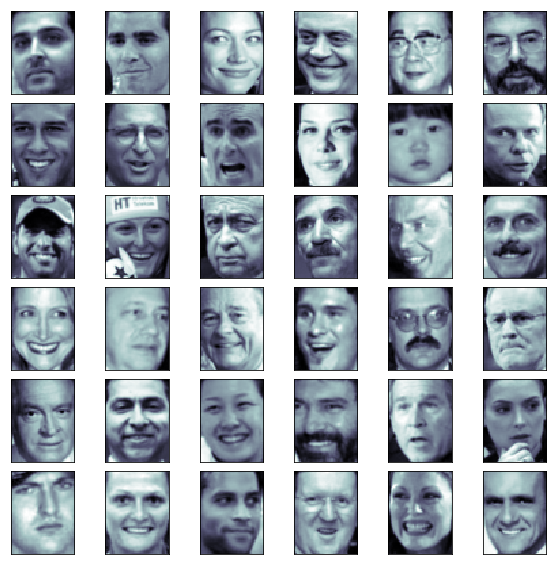

In [17]:
plot_faces(example_faces)

In [18]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(svd_solver='randomized')

In [22]:
%time pca.fit(X)

Wall time: 1min 38s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [24]:
pca.components_.shape

(2914, 2914)

In [25]:
pca.explained_variance_ratio_

array([2.333312e-01, 1.069372e-01, 8.233322e-02, ..., 9.818395e-09,
       9.253816e-09, 8.876020e-09], dtype=float32)

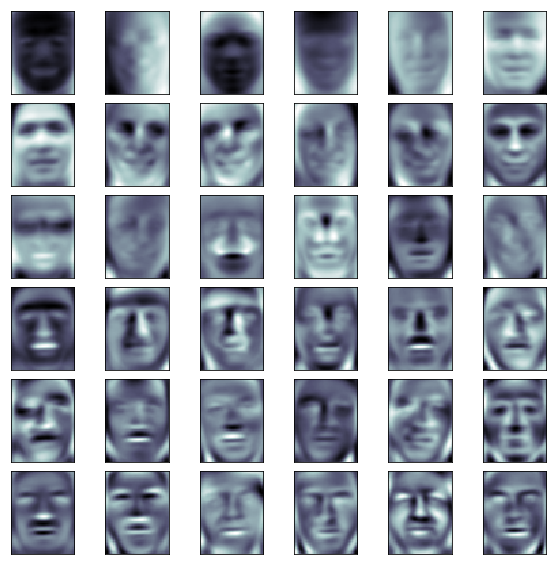

In [26]:
plot_faces(pca.components_[:36, :])

In [27]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [29]:
faces2.data.shape

(1348, 2914)

In [30]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [31]:
len(faces2.target_names)

8